# Trajectory inference and pseudotemporal ordering

# Setup

**Only run this setup section on google colab, do not run this code if you use this notebook in a different environment.**

In [ ]:
download.file("https://github.com/eddelbuettel/r2u/raw/master/inst/scripts/add_cranapt_jammy.sh",
              "add_cranapt_jammy.sh")
Sys.chmod("add_cranapt_jammy.sh", "0755")
system("./add_cranapt_jammy.sh")
bspm::enable()
options(bspm.version.check=FALSE)
system("rm add_cranapt_jammy.sh")

Tracing function "install.packages" in package "utils"



We will create an R function to performs system calls

In [ ]:
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

Install required libraries

In [ ]:
install.packages("R.utils")
remotes::install_github('satijalab/seurat-wrappers@d28512f804d5fe05e6d68900ca9221020d52cf1d', upgrade=F)
remotes::install_github('satijalab/seurat-data')

if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager", quiet = T)

install.packages("harmony")
BiocManager::install("destiny", update = F)
remotes::install_github('cole-trapnell-lab/monocle3')
#install.packages("https://cran.r-project.org/src/contrib/Archive/Matrix/Matrix_1.5-3.tar.gz", repos=NULL, type="source")


Installing 68 packages: RcppEigen, sitmo, BH, RcppProgress, dqrng, RSpectra, RcppAnnoy, irlba, FNN, polyclip, deldir, spatstat.utils, spatstat.data, tensor, abind, goftest, spatstat.sparse, spatstat.random, spatstat.geom, plyr, parallelly, listenv, globals, RcppArmadillo, matrixStats, gridExtra, reshape2, future, future.apply, bitops, caTools, gtools, gplots, png, here, RcppTOML, crosstalk, lazyeval, zoo, igraph, reticulate, dotCall64, spam, progressr, sp, uwot, spatstat.explore, sctransform, scattermore, Rtsne, ROCR, RcppHNSW, RANN, plotly, pbapply, patchwork, lmtest, leiden, ica, ggridges, ggrepel, fitdistrplus, fastDummies, cowplot, SeuratObject, Seurat, rsvd, BiocManager



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpzzBiuJ/remotes5125a723fe0/satijalab-seurat-wrappers-d28512f/DESCRIPTION’ ... OK
* preparing ‘SeuratWrappers’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘SeuratWrappers_0.3.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpzzBiuJ/remotes5127aaa15e3/satijalab-seurat-data-4dc08e0/DESCRIPTION’ ... OK
* preparing ‘SeuratData’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘SeuratData_0.2.2.9001.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Installing package(s) 'BiocVersion', 'destiny'




RCurl        (NA -> 1.98-1.16) [CRAN]
wk           (NA -> 0.9.2    ) [CRAN]
units        (NA -> 0.8-5    ) [CRAN]
s2           (NA -> 1.1.6    ) [CRAN]
classInt     (NA -> 0.4-10   ) [CRAN]
warp         (NA -> 0.2.1    ) [CRAN]
Rhdf5lib     (NA -> 1.24.2   ) [CRAN]
rhdf5filters (NA -> 1.14.1   ) [CRAN]
vipor        (NA -> 0.4.7    ) [CRAN]
beeswarm     (NA -> 0.4.0    ) [CRAN]
formatR      (NA -> 1.14     ) [CRAN]
futile.op... (NA -> 1.0.1    ) [CRAN]
lambda.r     (NA -> 1.2.4    ) [CRAN]
sparseMat... (NA -> 1.14.0   ) [CRAN]
snow         (NA -> 0.4-4    ) [CRAN]
futile.lo... (NA -> 1.4.3    ) [CRAN]
beachmat     (NA -> 2.18.1   ) [CRAN]
DelayedMa... (NA -> 1.24.0   ) [CRAN]
BiocParallel (NA -> 1.36.0   ) [CRAN]
ScaledMatrix (NA -> 1.10.0   ) [CRAN]
biglm        (NA -> 0.9-3    ) [CRAN]
sf           (NA -> 1.0-16   ) [CRAN]
spData       (NA -> 2.3.1    ) [CRAN]
slider       (NA -> 0.3.1    ) [CRAN]
furrr        (NA -> 0.3.1    ) [CRAN]
statmod      (NA -> 1.5.0    ) [CRAN]
rhdf5       

Skipping 15 packages ahead of CRAN: zlibbioc, XVector, SparseArray, S4Arrays, IRanges, S4Vectors, MatrixGenerics, BiocGenerics, GenomeInfoDbData, GenomeInfoDb, DelayedArray, Biobase, SummarizedExperiment, GenomicRanges, SingleCellExperiment

Installing 48 packages: RCurl, wk, units, s2, classInt, warp, Rhdf5lib, rhdf5filters, vipor, beeswarm, formatR, futile.options, lambda.r, sparseMatrixStats, snow, futile.logger, beachmat, DelayedMatrixStats, BiocParallel, ScaledMatrix, biglm, sf, spData, slider, furrr, statmod, rhdf5, ggbeeswarm, Cairo, ResidualMatrix, scuttle, BiocSingular, BiocNeighbors, viridis, speedglm, spdep, slam, rsample, pscl, pheatmap, pbmcapply, limma, leidenbase, HDF5Array, grr, ggrastr, batchelor, assertthat



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpzzBiuJ/remotes512254221f5/cole-trapnell-lab-monocle3-98402ed/DESCRIPTION’ ... OK
* preparing ‘monocle3’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘monocle3_1.3.7.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Introduction

Cells transition from one state to another during development and throughout life. In each of these states, their gene expression changes in a dynamic way, wherein some of them get activated an others silenced. Using single-cell RNA-seq data, computational tools such as Monocle3 can infer the single-cell trajectories that cells undergo when transitioning across the different functional states.

In this tutorial we will explore how the cellular trajectories and pseudotime can be inferred using Monocle3.

This tutorial is based and inspired on these other tutorials:

- [Original tutorial of Monocle3](https://cole-trapnell-lab.github.io/monocle3/docs/trajectories/)
- [Tutorial combining Seurat and Monocle3 by the Stuart Lab](https://stuartlab.org/signac/articles/monocle.html)
- [Tutorial combining Seurat and Monocle3 by Mahima Bose](https://rpubs.com/mahima_bose/Seurat_and_Monocle3_p)

![Monocle3](https://cole-trapnell-lab.github.io/monocle3/images/manual_images/embryo_pr_graph_by_pseudotime.png)

In [ ]:
library(monocle3)
library(Seurat)
library(SeuratData)
library(SeuratWrappers)
library(patchwork)
library(harmony)
library(ggplot2)

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading requi

# Loading Data

Here we load our datasets of interest to perform the integration.

This tutorial walks through an alignment of two groups of PBMCs from [Kang et al, 2017](https://www.nature.com/articles/nbt.4042). In this experiment, PBMCs were split into a stimulated and control group and the stimulated group was treated with interferon beta. The response to interferon caused cell type specific gene expression changes that makes a joint analysis of all the data difficult, with cells clustering both by stimulation condition and by cell type.

In [ ]:
# install dataset
InstallData("ifnb")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# load dataset
LoadData("ifnb")

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Warning message:
“Assay RNA changing from Assay to Assay”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Validating object structure for Assay ‘RNA’

Object representation is consistent with the most current Seurat version

Warning message:
“Assay RNA changing from Assay to Assay5”


An object of class Seurat 
14053 features across 13999 samples within 1 assay 
Active assay: RNA (14053 features, 0 variable features)
 2 layers present: counts, data

In [ ]:
testdata <- ifnb

In [ ]:
testdata <- UpdateSeuratObject(object = testdata)
testdata %>% dplyr::glimpse()

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Warning message:
“Assay RNA changing from Assay to Assay”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Validating object structure for Assay ‘RNA’

Object representation is consistent with the most current Seurat version



Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  ..@ meta.data   :'data.frame':	13999 obs. of  5 variables:
  .. ..$ orig.ident        : chr [1:13999] "IMMUNE_CTRL" "IMMUNE_CTRL" "IMMUNE_CTRL" "IMMUNE_CTRL" ...
  .. ..$ nCount_RNA        : num [1:13999] 3017 2481 3420 3156 1868 ...
  .. ..$ nFeature_RNA      : int [1:13999] 877 713 850 1109 634 557 980 581 880 669 ...
  .. ..$ stim              : chr [1:13999] "CTRL" "CTRL" "CTRL" "CTRL" ...
  .. ..$ seurat_annotations: Factor w/ 13 levels "CD14 Mono","CD4 Naive T",..: 1 1 1 12 3 1 7 2 6 1 ...
  ..@ active.assay: chr "RNA"
  ..@ active.ident: Factor w/ 2 levels "IMMUNE_CTRL",..: 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "names")= chr [1:13999] "AAACATACATTTCC.1" "AAACATACCAGAAA.1" "AAACATACCTCGCT.1" "AAACATACCTGGTA.1" ...
  ..@ graphs      : list()
  ..@ neighbors   : list()
  ..@ reductions  : list()
  ..@ images      : li

# Data Processing

We perform the typical data processing, integration, batch correction, and clustering before running Monocle3.

In [ ]:
testdata <- Seurat::NormalizeData(testdata, verbose = FALSE) %>%
            FindVariableFeatures(selection.method = "vst", nfeatures = 2000) %>%
            ScaleData(verbose = FALSE) %>%
            RunPCA(npcs = 30, verbose = FALSE) %>%
            RunHarmony("stim", plot_convergence = FALSE) %>%
            RunUMAP(reduction = "harmony", dims = 1:30) %>%
            FindNeighbors(reduction = "harmony", dims = 1:30) %>%
            FindClusters(resolution = 0.5)

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony converged after 5 iterations

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
21:43:32 UMAP embedding parameters a = 0.9922 b = 1.112

21:43:32 Read 13999 rows and found 30 numeric columns

21:43:32 Using Annoy for neighbor search, n_neighbors = 30

21:43:32 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:43:35 Writing NN index file to temp file /tmp/RtmpzzBiuJ/file512347bb

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13999
Number of edges: 519284

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8984
Number of communities: 14
Elapsed time: 4 seconds


This is how the UMAP looks like:

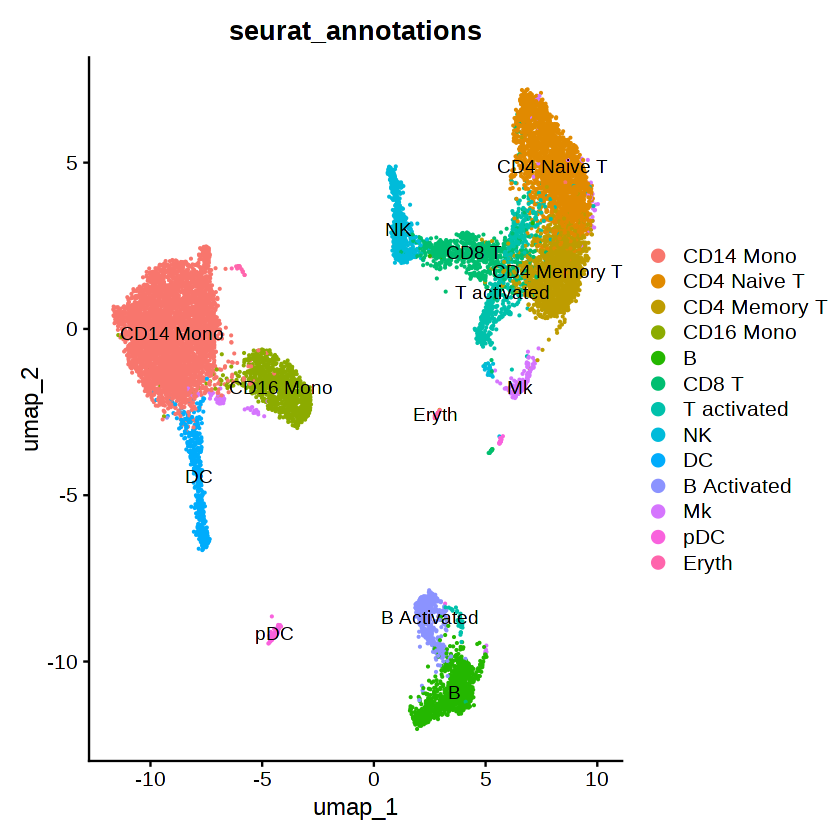

In [ ]:
scPlot <- DimPlot(testdata, label = TRUE, group.by = 'seurat_annotations')
scPlot
#ggsave("01-DimPlot.png", plot = scPlot, bg = "white")

# Running Monocle3

We can convert a Seurat object to a CellDataSet object using the `as.cell_data_set()` function from the library SeuratWrappers. Then, this object is used by Monocle3 to infer the trajectories.

In [ ]:
cds <- as.cell_data_set(testdata)
fData(cds)$gene_short_name <- rownames(fData(cds))

Warning message:
“Monocle 3 trajectories require cluster partitions, which Seurat does not calculate. Please run 'cluster_cells' on your cell_data_set object”


In [ ]:
cds %>% dplyr::glimpse()

Formal class 'cell_data_set' [package "monocle3"] with 13 slots
  ..@ reduce_dim_aux     :Formal class 'SimpleList' [package "S4Vectors"] with 4 slots
  ..@ principal_graph_aux:Formal class 'SimpleList' [package "S4Vectors"] with 4 slots
  ..@ principal_graph    :Formal class 'SimpleList' [package "S4Vectors"] with 4 slots
  ..@ clusters           :Formal class 'SimpleList' [package "S4Vectors"] with 4 slots
  ..@ int_elementMetadata:Formal class 'DFrame' [package "S4Vectors"] with 6 slots
  ..@ int_colData        :Formal class 'DFrame' [package "S4Vectors"] with 6 slots
  ..@ int_metadata       :List of 2
  .. ..$ version    :Classes 'package_version', 'numeric_version'  hidden list of 1
  .. ..$ mainExpName: chr "RNA"
  ..@ rowRanges          :Formal class 'CompressedGRangesList' [package "GenomicRanges"] with 5 slots
  ..@ colData            :Formal class 'DFrame' [package "S4Vectors"] with 6 slots
  ..@ assays             :Formal class 'SimpleAssays' [package "SummarizedExperiment"

**Inferring trajectory**

Monocle can learn when cells should be placed in the same trajectory as opposed to separate trajectories through its clustering procedure. In the clustering process, each cell is assigned not only to a cluster but also to a partition. When inferring trajectories, each partition will eventually become a separate trajectory. Here we cluster cells (`cluster_cells()`), then infer the trajectory (`learn_graph()`).

In [ ]:
cds <- cluster_cells(cds = cds, reduction_method = "UMAP", cluster_method = 'louvain') %>%
       learn_graph(use_partition = T)

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


We can then plot the inferred trajectory.

The black lines show the structure of the graph. Here, the graph is not fully connected: cells in different partitions are in distinct components of the graph.

The circles with numbers in them denote special points within the graph. Each leaf, denoted by light gray circles, corresponds to a different outcome (i.e. cell fate) of the trajectory. Black circles indicate branch nodes, in which cells can travel to one of several outcomes.

You can control whether or not these are shown in the plot with the `label_leaves` and `label_branch_points` arguments to `plot_cells`. Please note that numbers within the circles are provided for reference purposes only.

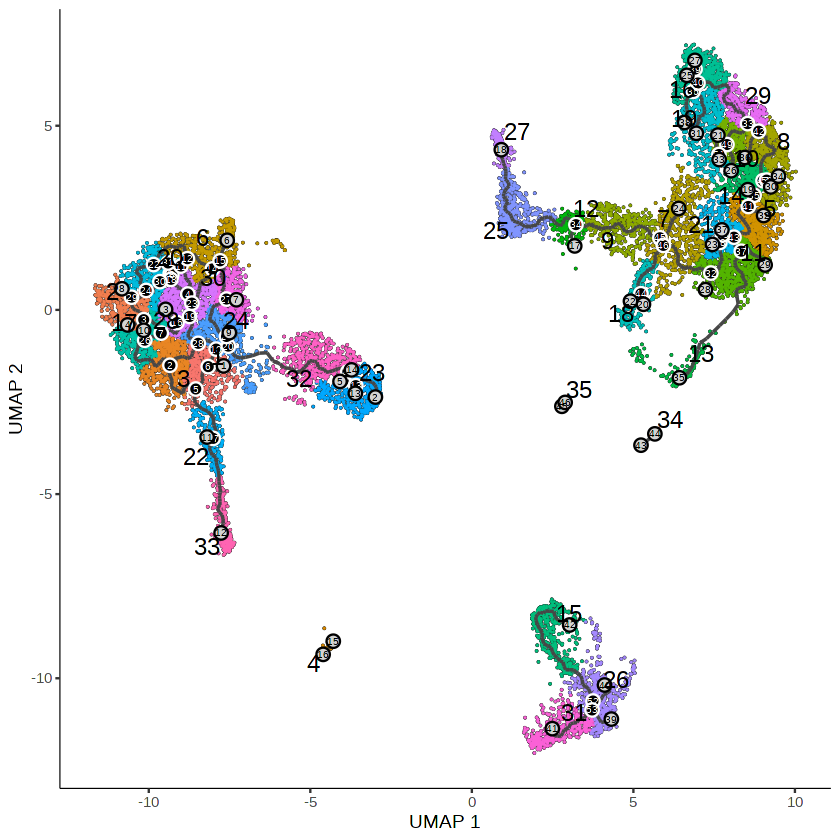

In [ ]:
scPlot <- plot_cells(cds, color_cells_by = "cluster", label_groups_by_cluster = F,
                       label_branch_points = T, label_roots = T, label_leaves = T,
                       group_label_size = 5)
scPlot
#ggsave("02-plot_cells.png", plot = scPlot, bg = "white",width = 9, height = 9, dpi = 600)

Here we can have a more clean visualization by removing labels

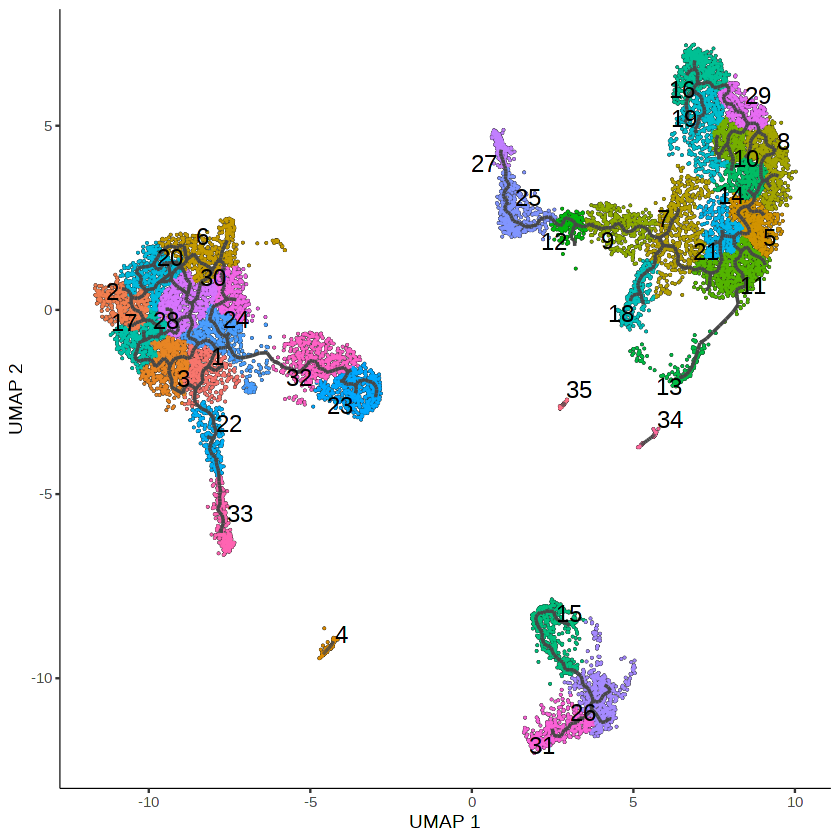

In [ ]:
scPlot <- plot_cells(cds, color_cells_by = "cluster", label_groups_by_cluster = F,
                       label_branch_points = F, label_roots = F, label_leaves = F,
                       group_label_size = 5)
scPlot
#ggsave("03-plot_cells.png", plot = scPlot, bg = "white",width = 9, height = 9, dpi = 600)

**Inferring pseudotime**

Pseudotime serves as a measure of individual cell advancement in processes like cell differentiation. In various biological scenarios, cells don't progress uniformly, resulting in a diverse distribution of captured cells based on their progress.

Monocle orders cells along a learned trajectory using pseudotime, which represents an abstract measure of progress. Pseudotime is determined by the distance between a cell and the trajectory's starting point, measured along the shortest path. The trajectory's length corresponds to the total transcriptional changes a cell undergoes from the initial to the final state.

Comparing the annotated UMAP and the Monocle3 trajectory, we can define which Monocle clusters are the roots for inferring differentiation:

Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


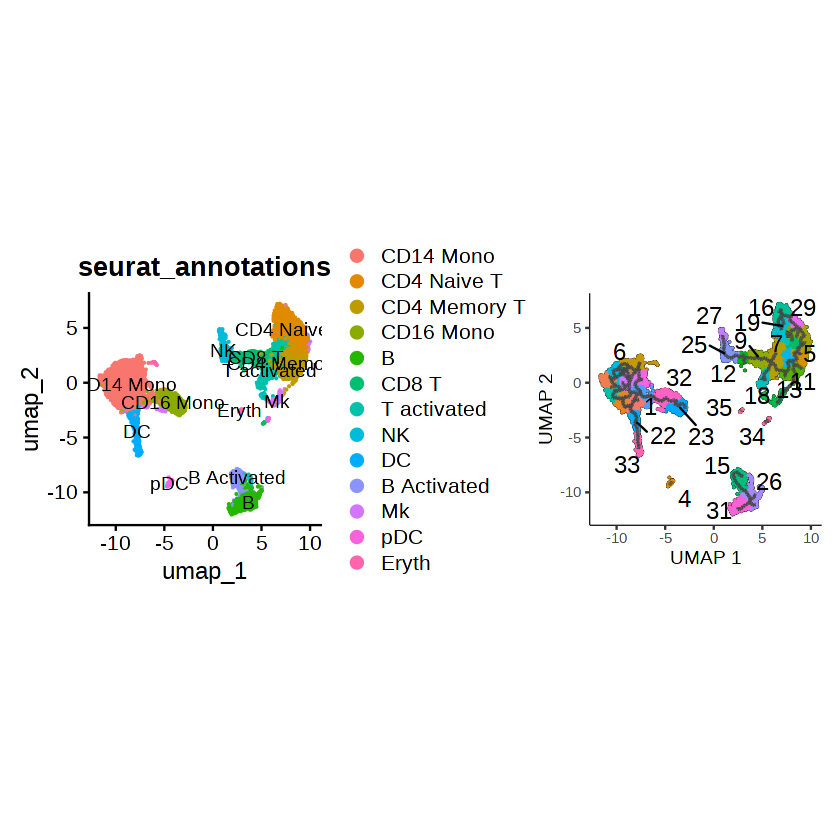

In [ ]:
#options(repr.plot.height = 9, repr.plot.width = 16)

gumap <- DimPlot(testdata, label = TRUE, group.by = 'seurat_annotations')
gcluster <- plot_cells(cds, color_cells_by = "cluster", label_groups_by_cluster = F,
                       label_branch_points = F, label_roots = F, label_leaves = F,
                       group_label_size = 5)
scPlot <- gumap + gcluster + theme(aspect.ratio = 1)
scPlot
#ggsave("04-DimPlot-plot_cells.png", plot = scPlot, bg = "white",width = 18, height = 9, dpi = 600)

Then, using the following command, we can select root cells or starting states in the trajectory and infer the pseudotime for each of the other cells.

In [ ]:
cds <- order_cells(cds, reduction_method = "UMAP", root_cells = colnames(cds[, clusters(cds) %in% c(3, 15, 9, 22)]))

Then we can color cells along their trajectory by using their pseudotimes.

Cells aren't colored in a way that allows them to be grouped.

Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


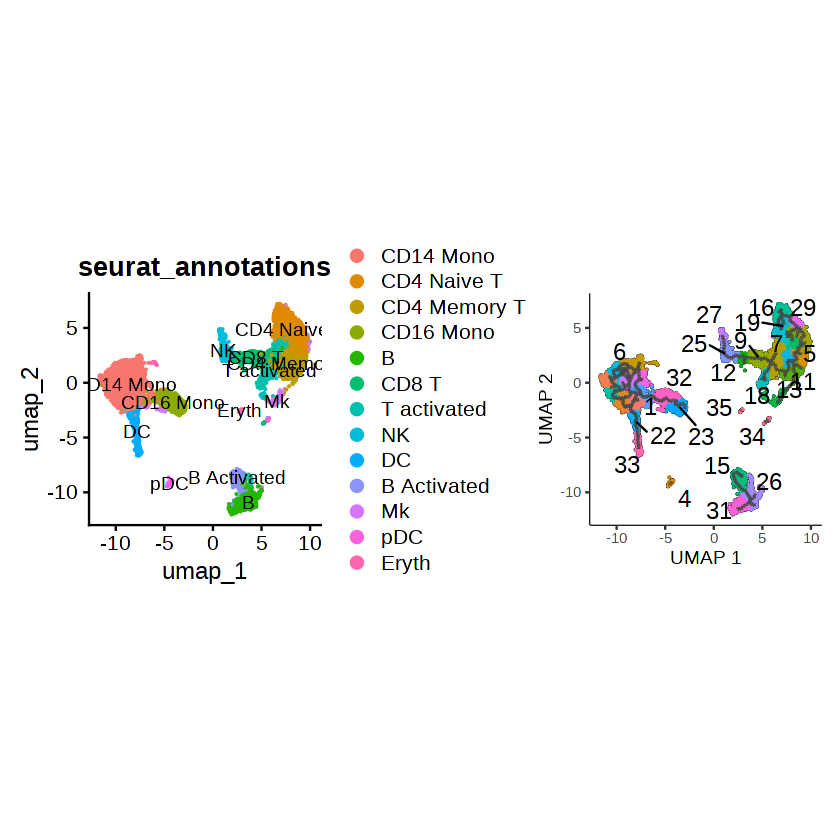

In [ ]:
options(repr.plot.height = 7, repr.plot.width = 7)
scPlot1 <- plot_cells(cds, color_cells_by = "pseudotime", label_groups_by_cluster = F,
                       label_branch_points = F, label_roots = F, label_leaves = F,
                       group_label_size = 5)
scPlot
#ggsave("05-plot_cells.png", plot = scPlot1, bg = "white",width = 9, height = 9, dpi = 600)

A joint UMAP representation of the Seurat Clusters, Trajectory, and Pseudotimes.

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


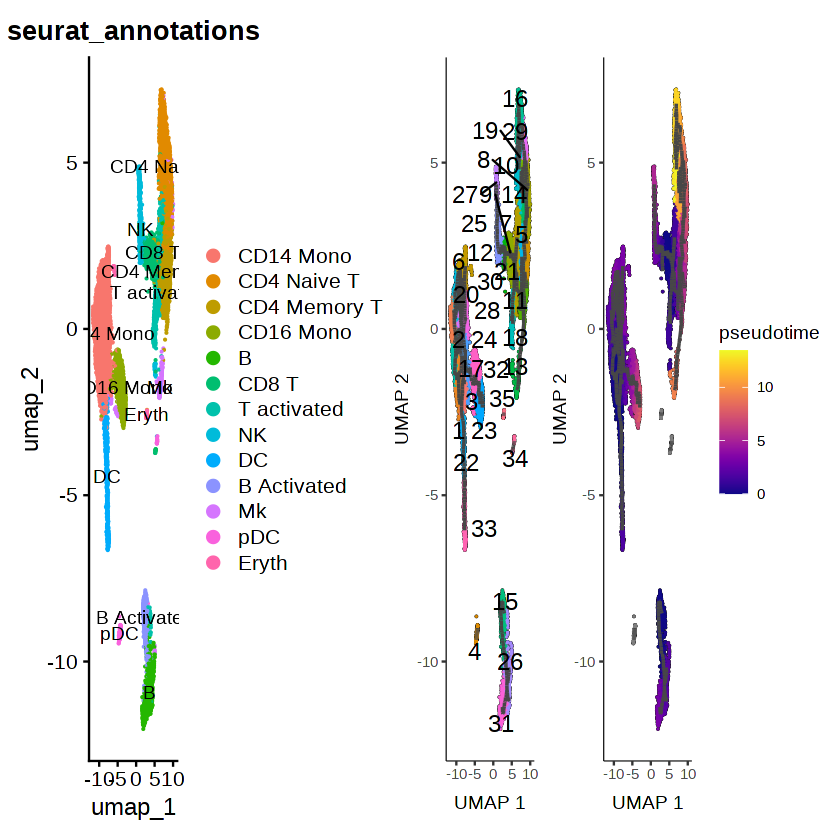

In [ ]:
#options(repr.plot.height=6, repr.plot.width=16)
scPlot <- gumap + gcluster + scPlot1
scPlot
#ggsave("06-Multiple_plots.png", plot = scPlot, bg = "white",width = 27, height = 9, dpi = 600)

We can order the seurat clusters by the pseudotimes they are associated with.

Warning message:
“Removed 182 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


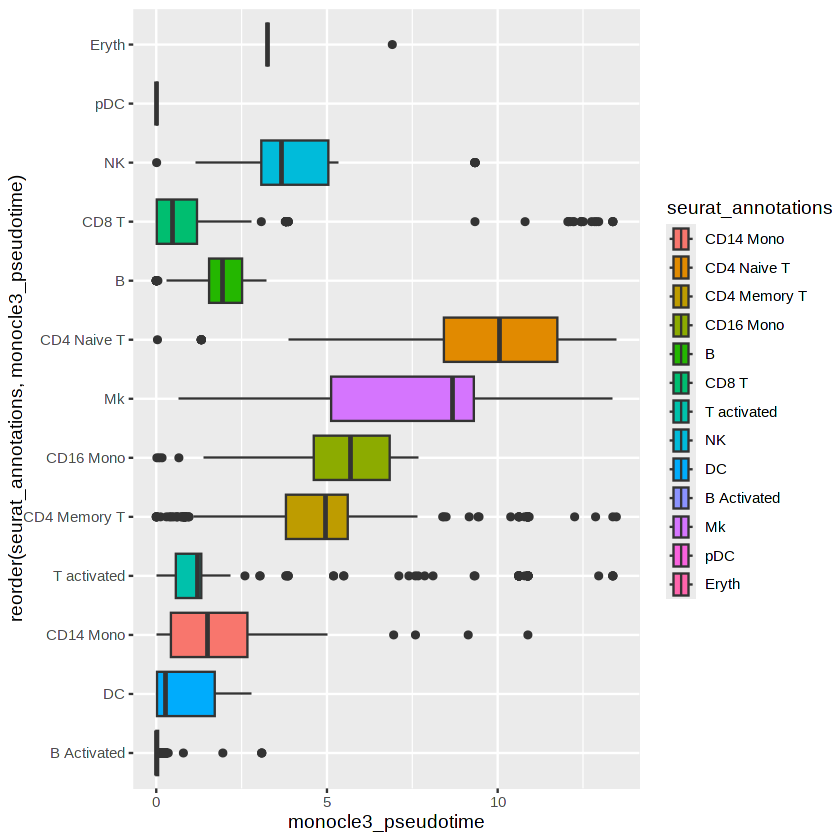

In [ ]:
#options(repr.plot.height=7, repr.plot.width=7)

cds$monocle3_pseudotime <- pseudotime(cds)
data.pseudo <- as.data.frame(colData(cds))

scPlot <- ggplot(data.pseudo, aes(monocle3_pseudotime, reorder(seurat_annotations, monocle3_pseudotime), fill = seurat_annotations)) + geom_boxplot()
scPlot
#ggsave("07-boxplot.png", plot = scPlot, bg = "white")

Finally, we can inspect how gene expression of a few genes changes across pseudotimes.

In [ ]:
cds_subset <- cds[c('CD44', 'CXCL2'),]

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


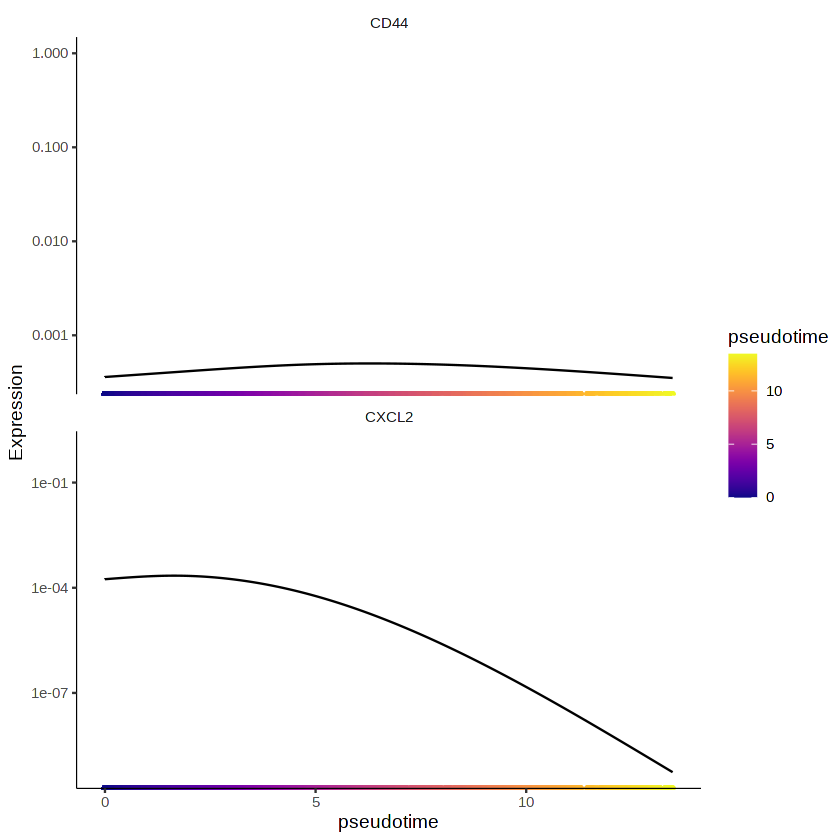

In [ ]:
scPlot <- plot_genes_in_pseudotime(cds_subset)
scPlot
#ggsave("08-genes_in_pseudotime.png", plot = scPlot, bg = "white")

In [ ]:
# With this code below we can identify genes that change their expression across pseudotimes. However, this takes time to run.
#cds_pr_test_res <- graph_test(cds, neighbor_graph="principal_graph", cores=4)
#pr_deg_ids <- row.names(subset(cds_pr_test_res, q_value < 0.05))
#pr_deg_ids

# Session information

In [ ]:
print(sessionInfo())

R version 4.4.1 (2024-06-14)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ifnb.SeuratData_3.1.0       ggplot2_3.5.1              
 [3] harmony_1.2.0               Rcpp_1.0.12                
 [5] patchwork_1.2.0             SeuratWrap

# Extra Questions:

- How does selecting different root cells affect the analysis?
- Perform the analysis for one cell type of interest. Can you identify cell subtypes?
- Do the marker genes of this cell type change across pseudotime?